# Лабораторная работа №1: Моделирование стандартных дискретных сигналов

Выполнили студентки гр. 1381 Деркачева Дарья, Манцева Татьяна. Вариант №1.

## Цель работы

Изучить математическое описание стандартных дискретных сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения
- Аналоговый сигнал:

Непрерывный сигнал, который может принимать любые значения времени и амплитуды.

- Дискретный сигнал:

Сигнал, определённый только в дискретные моменты времени (разбивается на отдельные отсчёты).

- Дискретное время:

Это время, которое представлено в дискретных (мгновенных) отсчетах.

- Нормированное дискретное время

Это форма представления дискретного времени, в котором оно выражено в целых числах без привязки к периоду дискретизации $ T $.

- Единичный цифровой импульс:
 
$ \delta_d(k) =  \begin{cases} 
1, & k = 0 \\ 
0, & k \neq 0 
\end{cases} $

- Дельта-функция Дирака $ \delta(t) $ в непрерывной времени — это функция, значение которой бесконечно велико в нуле и её интеграл равен 1: 

$ \int_{-\infty}^{\infty} \delta(t) , dt = 1 $ 

- Дискретный единичный скачек:

$ \sigma_d(k) = \begin{cases} 
1, & k \geq 0 \\ 
0, & k < 0 
\end{cases} $

- Аналоговый единичный скачек:

$\sigma(t) = \begin{cases} 
1, & t > 0 \\  
0.5 \text{ или не определена}, & t = 0 \\ 
0, & t < 0 
\end{cases}$

- Частота дискретизации:

Это величина, обратная периоду дискретизации $ T $: $ f_s = \frac{1}{T} $

- Дискретная экспоненциальная функция:
  
$ s_1(k) = \begin{cases} 
a^k, & k \geq 0 \\ 
0, &  k < 0 
\end{cases}, \quad \text{где } k \in \mathbb{Z} $,


- Аналоговая экспоненциальная функция:

$s(t) = \begin{cases} 
a^t, &  t \geq 0 \\ 
0, &  t < 0 
\end{cases}, \quad \text{где }  t \in \mathbb{R} $

- Дискретный комплексный гармонический сигнал:

$ s_2(k) = C \exp(j {\omega_0} k) $



## Постановка задачи

С помощью программных средств провести моделирование и анализ стандартных дискретных последовательностей. Результаты подкрепить соответствующими графиками и выводами.

## Выполнение работы

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Константы
Nb = 1
N = 30 + Nb % 5
T = 0.0005 * (1 + Nb % 3)
a = (-1) ** Nb * (0.8 + 0.005 * (Nb % 20))
C = 1 + Nb % 5
w0 = np.pi / (6 + Nb % 5)
m = 5 + Nb % 5


| **Переменная** | **Назначение** | **Значение** |
|--------------|-----------------|--------------------------|
| Nb           | Номер бригады   | 1                        |
| N            | Длина последовательности | 31               |
| T            | Период дискретизации | 0.001                 |
| a            | Основание экспоненты | -0.805               |
| C            | Амплитуда гармонического сигнала | 2         |
| w0           | Частота гармонического сигнала | 0.4487989505128276 |
| m            | Задержка         | 6                        |

### Задание 1

Смоделировать единичный цифровой импульс $ \delta_d(k) $ с выводом графиков на интервале дискретного времени $ nT \in [0, (N-1)T] $ и дискретного нормированного времени $ n \in [0, N-1] $. Пояснить:

    a. Взаимосвязь между дискретным и дискретным нормированным временем 
    b. Различие между единичным цифровым импульсом и дельта-функцией


In [9]:
nT = np.arange(0, N) * T # Дискретное время
n = np.arange(0, N) # Дискретное нормированное время

# Единичный цифровой импульс
delta_d = np.zeros(N)
delta_d[0] = 1 

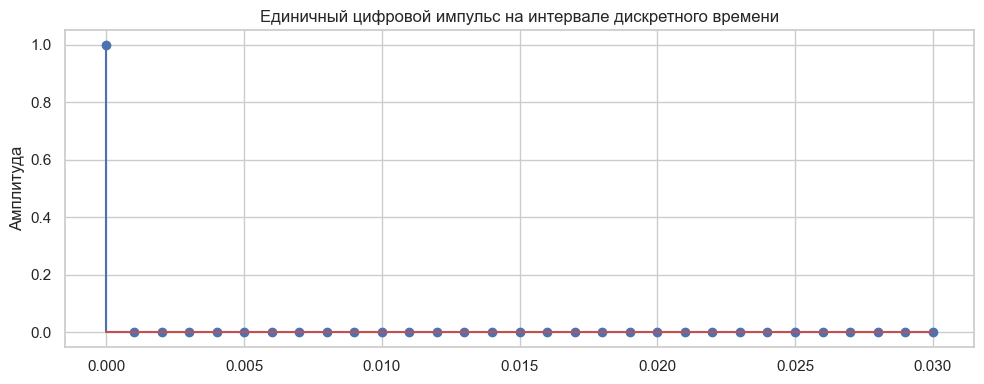

In [50]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 4))

plt.stem(nT, delta_d, markerfmt="o")
plt.title('Единичный цифровой импульс на интервале дискретного времени')
plt.ylabel('Амплитуда')

plt.tight_layout()

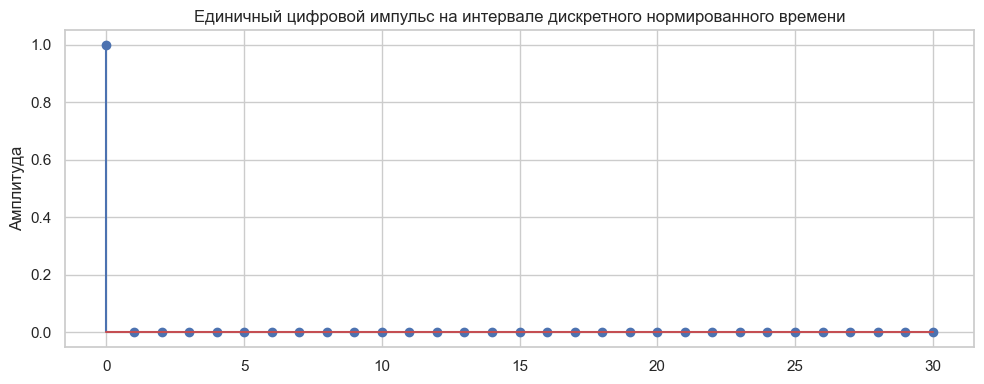

In [51]:
plt.figure(figsize=(10, 4))

plt.stem(n, delta_d, markerfmt="o")
plt.title('Единичный цифровой импульс на интервале дискретного нормированного времени')
plt.ylabel('Амплитуда')

plt.tight_layout()

**a. Взаимосвязь между дискретным и дискретным нормированным временем**

Дискретное время представляется как последовательность равномерно распределённых моментов времени с шагом, равным периоду дискретизации $ T $. Если передать шаг времени в виде коэффициента нормирования, то можно говорить о нормированном времени.

Если обозначить нормированное время через $ n $ и дискретное время через $ t = n \cdot T $, то зависимость дискретного времени от нормированного можно выразить следующим образом: $ t = n \cdot T $ где:
- $ t $ — дискретное время,
- $ n $ — нормированное время (индекс дискретной последовательности),
- $ T $ — период дискретизации.

Таким образом, дискретное нормированное время — это всего лишь индексы отсчетов, тогда как дискретное время — это физическое время (с шагом дискретизации $ T $).

**b. Различие между единичным цифровым импульсом и дельта-функцией**

- Единичный цифровой импульс (или функция Кронекера) $ \delta_d(k) $ определяется следующим образом: 

$ \delta_d(k) = \begin{cases} 
1, & k = 0 \\ 
0, & k \neq 0 
\end{cases} $ 

Это дискретный сигнал, который принимает значение 1 только в одном дискретном моменте времени — когда $ k = 0 $, и равен 0 во все другие моменты времени.

- Дельта-функция Дирака $ \delta(t) $ в непрерывной времени — это функция, значение которой бесконечно велико в нуле и её интеграл равен 1: 

$ \int_{-\infty}^{\infty} \delta(t) , dt = 1 $ 

Она используется для моделирования мгновенных событий в непрерывном времени.

    Отличие : Единичный цифровой импульс действует в дискретной области и является чисто числовым, тогда как дельта-функция Дирака используется в непрерывной области и обладает интегральными свойствами.

### Задание 2
Смоделировать дискретный единичный скачок $ \sigma_d(k) $ с выводом графиков на интервале дискретного времени $ nT \in [0, (N-1)T] $ и дискретного нормированного времени $ n \in [0, N-1] $. Пояснить:

    a. Соответствие между дискретным и аналоговым единичными скачками.
    b. Чему равна частота дискретизации дискретного единичного скачка.


In [35]:
# Дискретный единичный скачок
sigma_d = np.zeros(N)
sigma_d[:] = 1  

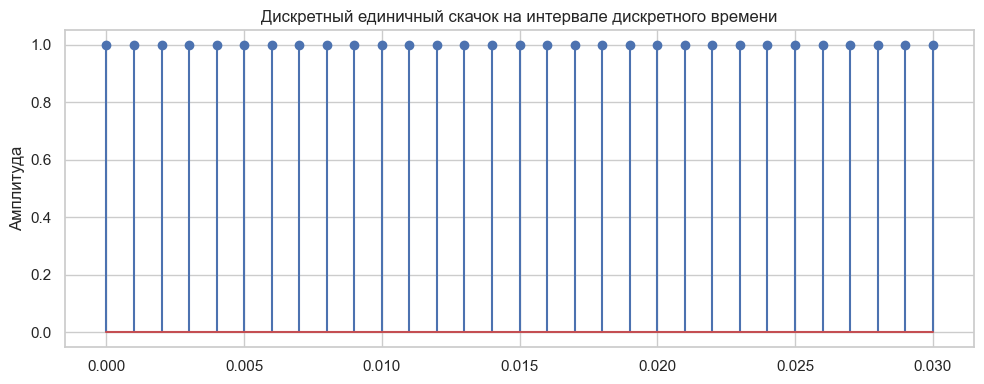

In [52]:
plt.figure(figsize=(10, 4))

plt.stem(nT, sigma_d, markerfmt="o")
plt.title('Дискретный единичный скачок на интервале дискретного времени')
plt.ylabel('Амплитуда')

plt.tight_layout()


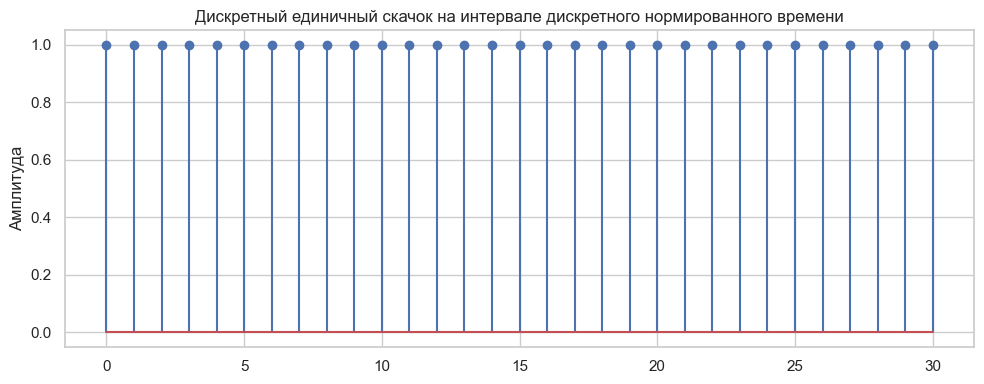

In [53]:
plt.figure(figsize=(10, 4))

plt.stem(n, sigma_d, markerfmt="o")
plt.title('Дискретный единичный скачок на интервале дискретного нормированного времени')
plt.ylabel('Амплитуда')

plt.tight_layout()

**a. Соответствие между дискретным и аналоговым единичными скачками**

- Дискретный единичный скачок $ \sigma_d(k) $ определяется следующим образом:
  
$ \sigma_d(k)  = \begin{cases} 
1, & k \geq 0 \\
0, & k < 0 
\end{cases} $ 

Этот сигнал равен единице для всех положительных значений времени $ k \geq 0 $, и равен нулю для всех $ k < 0 $.

- Аналоговый единичный скачок (функция Хевисайда, $ \sigma(t) $) в непрерывном времени:

$\sigma(t) = \begin{cases}
1, &  t > 0 \\
0.5  \text{ или не определена}, &  t = 0 \\ 
0, &  t < 0
\end{cases}$ ,  $\; t \in \mathbb{R}$

    Соответствие дискретного скачка аналоговому заключается в том, что оба сигнала моделируют момент времени, начиная с которого значение сигнала становится 1. Дискретный скачок — это дискретный аналог функции Хевисайда.



**b. Частота дискретизации дискретного единичного скачка**

Частота дискретизации — это величина, обратная периоду дискретизации $ T $: $ f_s = \frac{1}{T} $

### Задание 3
Смоделировать дискретную экспоненциальную функцию $ s_1(k) $ с выводом графиков на интервале дискретного времени $ nT \in [0, (N-1)T] $ и дискретного нормированного времени $ n \in [0, N-1] $. Пояснить соответствие между дискретной и аналоговой экспонентами.


In [113]:
# Дискретная экспотенциальная функция
s1 = a ** n

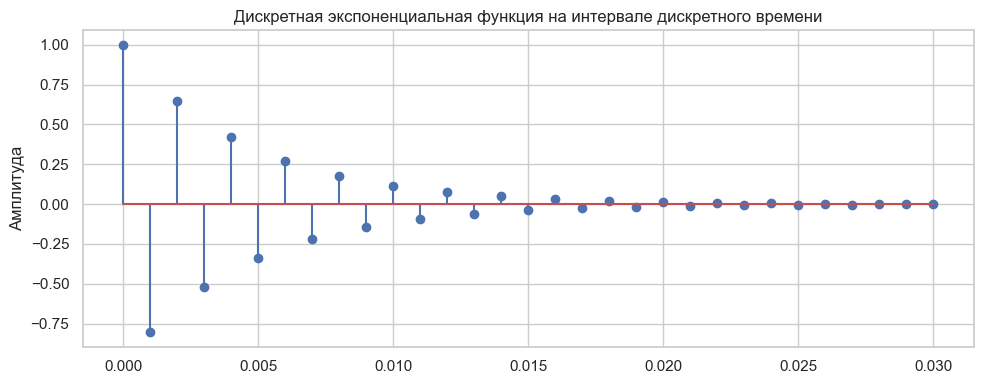

In [114]:
plt.figure(figsize=(10, 4))

plt.stem(nT, s1, markerfmt="o")
plt.title('Дискретная экспоненциальная функция на интервале дискретного времени')
plt.ylabel('Амплитуда')

plt.tight_layout()

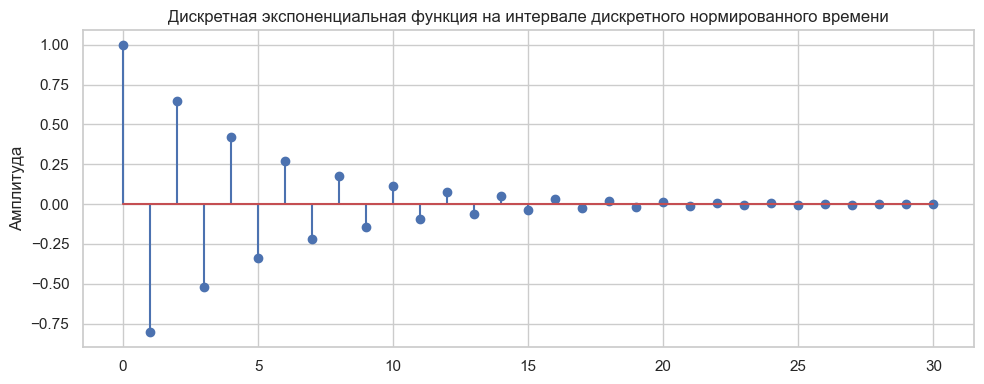

In [55]:
plt.figure(figsize=(10, 4))

plt.stem(n, s1, markerfmt="o")
plt.title('Дискретная экспоненциальная функция на интервале дискретного нормированного времени')
plt.ylabel('Амплитуда')

plt.tight_layout()

**Соответствие между дискретной и аналоговой экспонентами**

- Дискретная экспонента $ s_1(k) $ может быть записана как:
  
$ s_1(k) = \begin{cases} 
a^k, & k \geq 0 \\ 
0, &  k < 0 
\end{cases}, \quad \text{где } k \in \mathbb{Z} $,

где $ k $ — дискретное нормированное время.

- Аналоговая экспонента:

$s(t) = \begin{cases} 
a^t, &  t \geq 0 \\ 
0, &  t < 0 
\end{cases}, \quad \text{где }  t \in \mathbb{R} $

Для дискретной экспоненты прирост значения экспоненты происходит скачкообразно на каждом шаге. В свою очередь, аналоговая экспонента изменяет значение плавно во времени.

Соответствие: Дискретная экспонента описывает мгновенные отсчеты аналоговой экспоненты в моменты дискретного времени $ t = k \cdot T $.

### Задание 4
Смоделировать дискретный комплексный гармонический сигнал $s_2(k) = C \exp(j \hat{\omega_0} k)$ с выводом графиков вещественной и мнимой частей на интервале времени $ n \in [0, N-1] $ Записать данный сигнал в виде комбинации двух вещественных последовательностей.

In [115]:
# Дискретный комплексный гармонический сигнал
s2 = C * np.exp(1j * w0 * n)

# Вещественная часть
real = np.real(s2)

# Мнимая часть
imag = np.imag(s2)

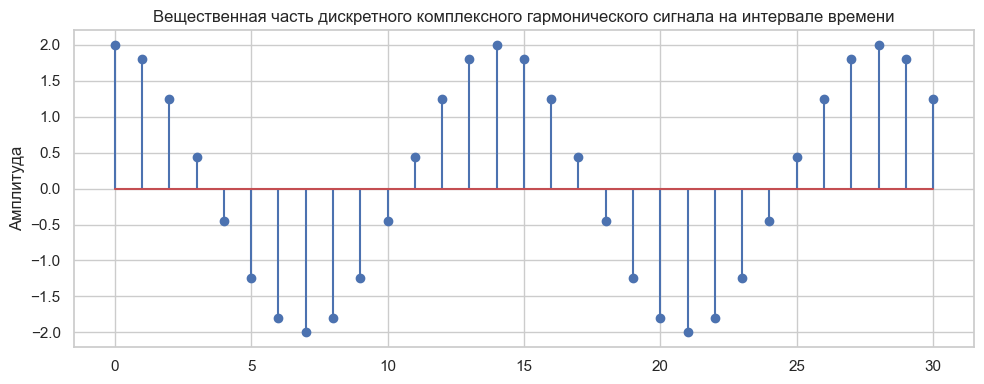

In [116]:
plt.figure(figsize=(10, 4))

plt.stem(n, real)
plt.title('Вещественная часть дискретного комплексного гармонического сигнала на интервале времени')
plt.ylabel('Амплитуда')

plt.tight_layout()

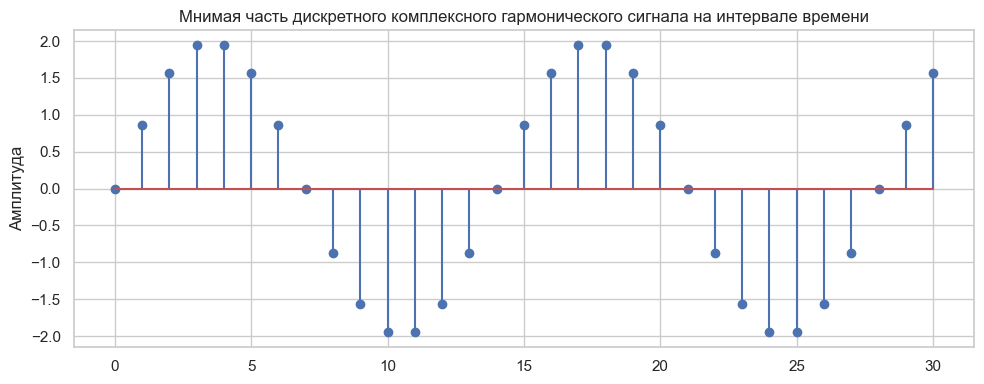

In [117]:
plt.figure(figsize=(10, 4))

plt.stem(n, imag)
plt.title('Мнимая часть дискретного комплексного гармонического сигнала на интервале времени')
plt.ylabel('Амплитуда')

plt.tight_layout()

Рассмотрим комплексный гармонический сигнал, заданный формулой:

$ s_2(k) = C \exp(j {\omega_0} k) $

Здесь:

- $ C $ — амплитуда сигнала,
- $ k $ — индекс дискретного времени,
- $ {\omega_0} $ — дискретная угловая частота сигнала,
- $ j $ — мнимая единица $ j^2 = -1 $.
 
Сигнал $ s_2(k) $ состоит из вещественной и мнимой частей. Чтобы записать наш сигнал в виде комбинации двух вещественных последовательностей,  используем формулу Эйлера:

$ \exp(j {\omega_0} k) = \cos({\omega_0} k) + j \sin({\omega_0} k) $

Таким образом, комплексный сигнал $ s_2(k) $ можно записать как комбинацию вещественной и мнимой частей:

$ s_2(k) = C \left[ \cos({\omega_0} k) + j \sin({\omega_0} k) \right] = C \cos({\omega_0} k) + j C \sin({\omega_0} k) $

где:

Вещественная часть сигнала: $ \text{Re}(s_2(k)) = C \cos({\omega_0} k) $,
Мнимая часть сигнала: $ \text{Im}(s_2(k)) = C \sin({\omega_0} k) $.

### Задание 5
Вывести графики последовательностей  $ \delta_d(k), \sigma_d(k), \text{и } s_1(k) $ задержанных на $ m $ отсчетов, на интервале времени $ n \in [0, N-1] $ Записать формулы задержанных последовательностей.

In [65]:
# Единичный цифровой импульс, задержанный на m = 6 отсчетов
delta_d = np.zeros(N)
delta_d[m] = 1  # Импульс

# Дискретный единичный скачок, задержанный на m = 6 отсчетов
sigma_d = np.zeros(N)
sigma_d[m:] = 1  

# Дискретная экспоненциальная функция, задержанная на m = 6 отсчетов
s1 = np.zeros(N) 
s1[m:] = C * a ** (n[m:])

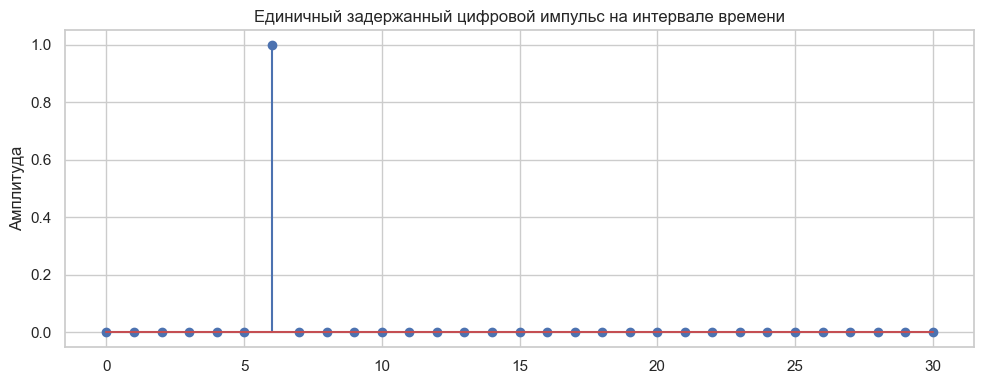

In [62]:
plt.figure(figsize=(10, 4))

plt.stem(n, delta_d, markerfmt="o")
plt.title('Единичный задержанный цифровой импульс на интервале времени')
plt.ylabel('Амплитуда')

plt.tight_layout()


Формула задержанного единичного цифрового импульса:

$\delta_d(k - m) =  \begin{cases} 
1, &  k = m \\ 
0, &  k \neq m 
\end{cases}, \quad \text{где } k  \in \mathbb{Z}$

где $ m $ — количество задержанных отсчетов.

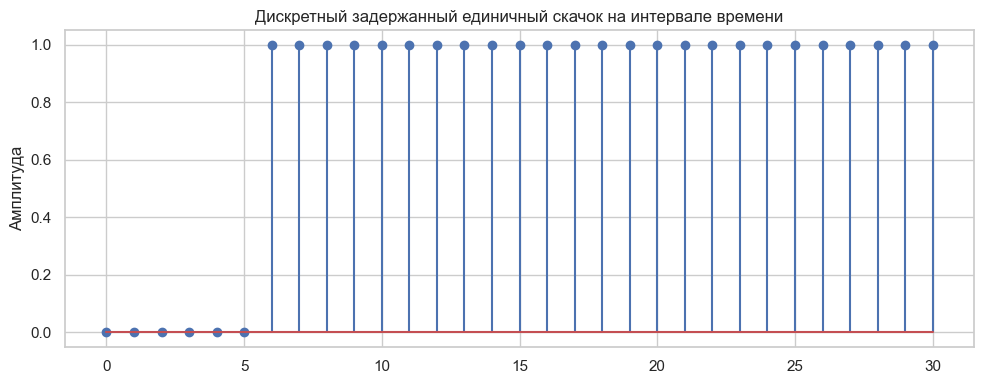

In [63]:
plt.figure(figsize=(10, 4))

plt.stem(n, sigma_d, markerfmt="o")
plt.title('Дискретный задержанный единичный скачок на интервале времени')
plt.ylabel('Амплитуда')

plt.tight_layout()

Формула задержанного единичного скачка :

$
\sigma_d(k - m) = \begin{cases} 
1, &  k \geq m \\ 
0, &  k < m 
\end{cases}, \quad \text{где } k \in \mathbb{Z}$

где $ m $ — количество задержанных отсчетов.

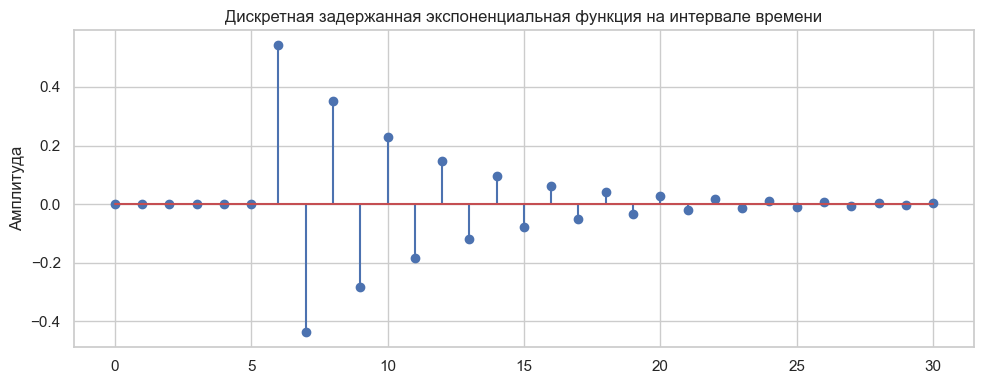

In [66]:
plt.figure(figsize=(10, 4))

plt.stem(n, s1, markerfmt="o")
plt.title('Дискретная задержанная экспоненциальная функция на интервале времени')
plt.ylabel('Амплитуда')

plt.tight_layout()

Формула задержанной экспоненты :

$ s_1(k - m) = 
\begin{cases} 
a^{k - m}, & k \geq m \\ 
0, &  k < m 
\end{cases}
$,  $\; k \in \mathbb{Z}$

где $ a $ — коэффициент затухания, $ m $ — количество задержанных отсчетов.

## Выводы

В ходе выполнения лабораторной работы были успешно изучены и смоделированы основные стандартные дискретные сигналы, такие как единичный цифровой импульс, единичный скачок, дискретная экспонента и дискретный комплексный гармонический сигнал. Проведено их моделирование и визуализация на интервалах дискретного времени и дискретного нормированного времени.Были записаны и визуализированы задержанные последовательности для всех смоделированных сигналов.